# Typical architecture of a regression neural network

Hyperparameters:

- Input layer shape
- Hidden layers
- Neurons per hidden layer
- Output layer shape
- Hidden activation
- Output activation
- loss function
- Optimizer



In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

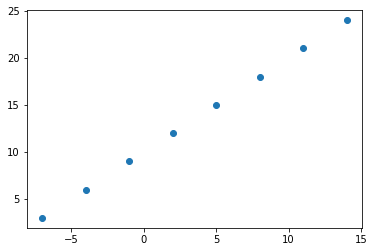

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

## Regression input shapes and output shapes

In [3]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

# Steps in modelling with Tensorflow

1. creating a model
2. compiling a model
3. fitting the model

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 612ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

# Improving a model

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 272ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 8m

In [10]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

# Evaluating model

In [11]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

# Split data into training/test set

training set   -> 70-80%

validation set -> 10-15%

test set       -> 10-15%

In [12]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

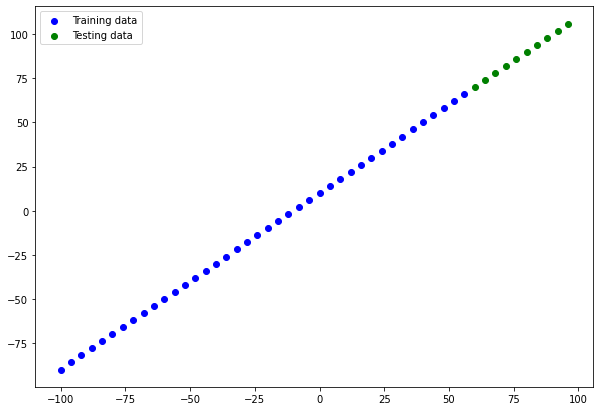

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs=100, verbose=0)

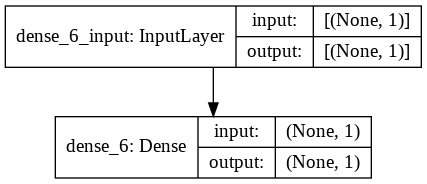

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [26]:
y_preds = model.predict(X_test)

In [28]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [32]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  '''
  Plots training data, test data and compares predictions
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  plt.legend()

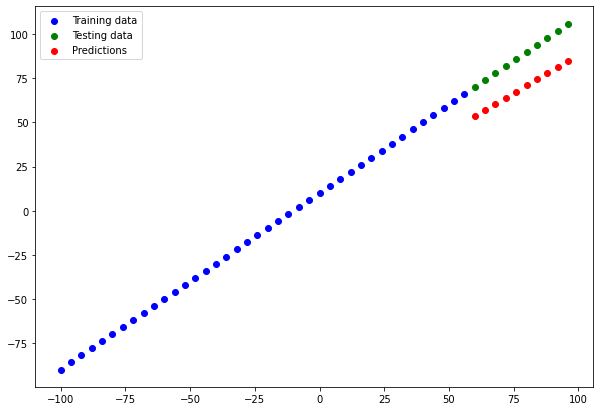

In [33]:
plot_predictions()

In [34]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 121ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [35]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [36]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [38]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [39]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [40]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [41]:
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

In [42]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

In [43]:
# Building model_1
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

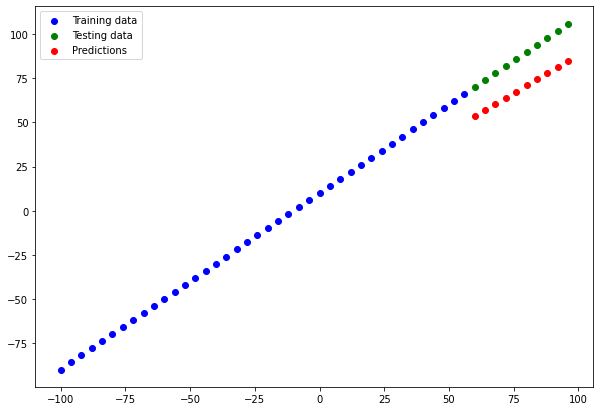

In [45]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [46]:
mae_1 = mae(y_test, y_pred=y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred=y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [47]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

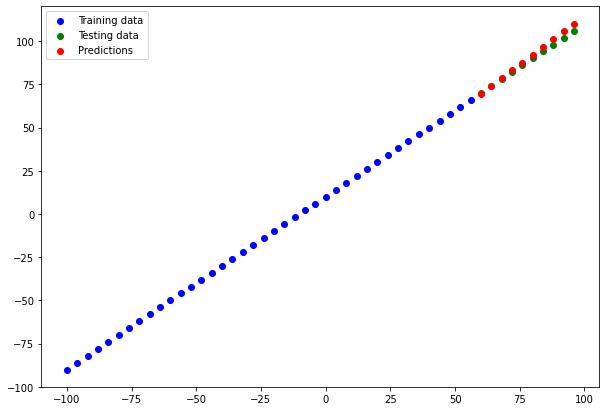

In [48]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [49]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

In [51]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

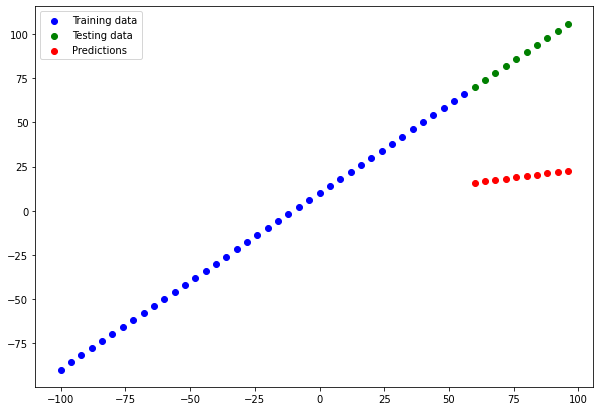

In [52]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [53]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

# Comparing results

In [54]:
model_results = [
        ['model_1', mae_1, mse_1],
        ['model_2', mae_2, mse_2],
        ['model_3', mae_3, mse_3]
]

import pandas as pd

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


# Tracking experiments
Tensorboard
Weights & Biases

# Saving model

two ways:

1. SavedModel format - allows automaticaly save custom objects
2. HDF5 format

In [55]:
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [56]:
model_2.save('best_model_HDF5_format.h5')

# Loading a model

In [57]:
loaded_saved_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_2_preds = model_2.predict(X_test)
loaded_model_preds = loaded_saved_model.predict(X_test)

mae(y_test, loaded_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [60]:
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [61]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [62]:
from google.colab import files
files.download('best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example

In [63]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [65]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [66]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [68]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7514.6177 - mae: 7514.6177
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9116 - mae: 7735.9116

In [69]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

In [70]:
insurance_model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_test, y_test, epochs=100, verbose=0)

In [71]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6822.3350 - mae: 6822.3350


[6822.3349609375, 6822.3349609375]

Text(0.5, 0, 'epochs')

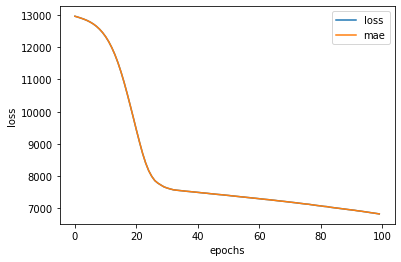

In [72]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [73]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3666.3794 - mae: 3666.3794


(3666.37939453125, 3666.37939453125)

Text(0.5, 0, 'epochs')

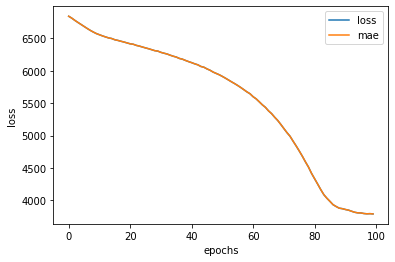

In [74]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Preprocessing data (normalization and standartization)

normalization making data between 0 and 1
standartization converting data to unit variance and 0 mean

- Turning all of your data to numbers

- Making sure your data is in the right shape

- Feature scaling:

  - Normalizing
  - Standartization


With NN you'll tend to favour normalization

In [75]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']),
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [79]:
insurance_model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [80]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)
insurance_model_3_loss, insurance_model_3_mae

9/9 [==============================] - 0s 2ms/step - loss: 3173.1885 - mae: 3173.1885


(3173.1884765625, 3173.1884765625)

# Excercises

- Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

- Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

- Try and improve the results we got on the insurance dataset, some things you might want to try include:

  - Building a larger model (how does one with 4 dense layers go?).
  - Increasing the number of units in each layer.
  - Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
  - What happens if you train for longer (say 300 epochs instead of 200)?

- Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [82]:
X = np.arange(-1000, 1000, 4)
y = np.arange(-900, 1100, 4)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=73)

In [90]:
tf.random.set_seed(73)

e_model = tf.keras.Sequential([
      tf.keras.layers.Dense(1000),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

e_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history = e_model.fit(X_train, y_train, epochs=150, verbose=0)

In [92]:
loss, mae = e_model.evaluate(X_test, y_test)
loss, mae

4/4 [==============================] - 0s 3ms/step - loss: 9.5570 - mae: 9.5570


(9.556983947753906, 9.556983947753906)

Text(0.5, 0, 'epochs')

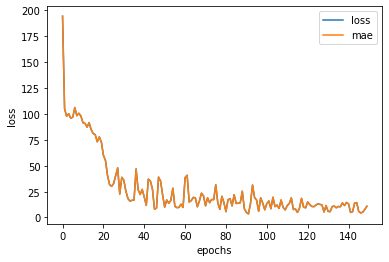

In [91]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [99]:
e_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(250),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

e_model_2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['mae'])

history_2 = e_model_2.fit(X_train, y_train, epochs=300, verbose=0)

In [100]:
loss_2, mae_2 = e_model.evaluate(X_test, y_test)
loss_2, mae_2 

4/4 [==============================] - 0s 3ms/step - loss: 9.5570 - mae: 9.5570


(9.556983947753906, 9.556983947753906)

Text(0.5, 0, 'epochs')

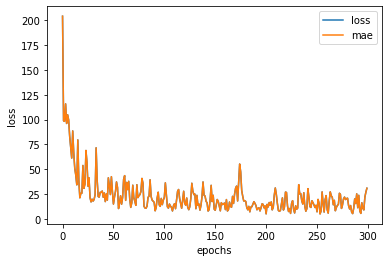

In [101]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [111]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [122]:
boston_model = tf.keras.Sequential([
          tf.keras.layers.Dense(150),
          tf.keras.layers.Dense(75),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

boston_model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                    metrics=['mae'])

boston_history = boston_model.fit(X_train, y_train, epochs=500, verbose=0)

In [123]:
boston_loss, boston_mae = boston_model.evaluate(X_test, y_test)
boston_loss, boston_mae

4/4 [==============================] - 0s 3ms/step - loss: 3.6187 - mae: 3.6187


(3.6187424659729004, 3.6187424659729004)

Text(0.5, 0, 'epochs')

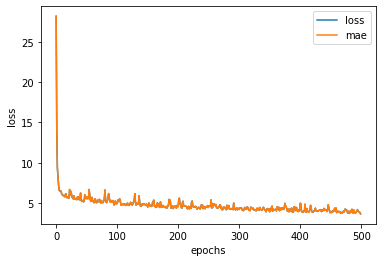

In [124]:
pd.DataFrame(boston_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

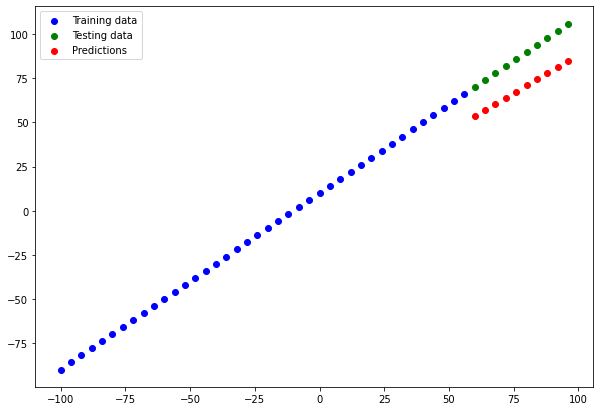

In [125]:
plot_predictions()